<a href="https://colab.research.google.com/github/diego2017003/ImersaoDados/blob/main/Aula3_ImersaoDados_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafios
---

##Desafio 01: Criar tabelas de frequência com pandas.groupby()

##Desafio 02: Normalizar o crosstab pela coluna.

##Desafio 03: Explorar outros agregadores.

##Desafio 04: Explorar o melt.

##Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos. 

##Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

##Desafio 07: Resumo do que você aprendeu com os dados

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados = dados.rename(columns=lambda x: "".join(x.split("-")))
dados

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.

In [6]:
#crosstab's apresentados na aula 3
ct1 = pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'])
ct2 = pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index')
ct3 = pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc='mean')
print(ct1)
print(ct2)
print(ct3)

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580
tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493
tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439


#Desafio 1
---

In [77]:
gba = dados.groupby(['dose','tempo','tratamento']).size().unstack(2)
gba

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [95]:
gbb = dados.groupby(['dose','tempo','tratamento']).size().unstack(2).transform(lambda x: (x/len(dados['tratamento'])))
gbb

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [91]:
gbc = dados.groupby(['dose','tempo','tratamento'])['g0'].mean().unstack(2)
gbc

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

#Desafio 2
---

In [98]:
ctD2 = pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='columns')
ctD2

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

#Desafio 3
---
Para questão de exemplo, retirado direto da documentação do [pandas aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html). Tem o exemplo nessa sessão de agregadores por minimo, maximo, e a soma dos valores de g0 para as linhas e colunas já exploradas anteriormente(dose,tempo,tratamento)   

In [101]:
gbmax = dados.groupby(['dose','tempo','tratamento'])['g0'].max().unstack(2)
gbmax

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [103]:
gbmin = dados.groupby(['dose','tempo','tratamento'])['g0'].min().unstack(2)
gbmin

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [105]:
gbsum = dados.groupby(['dose','tempo','tratamento'])['g0'].sum().unstack(2)
gbsum

tratamento  com_controle  com_droga
dose tempo                         
D1   24         -75.7799  1319.2648
     48         -42.1113  1654.4150
     72         -90.6483  1030.5010
D2   24           3.2800   412.7202
     48           4.0180   770.1980
     72          21.4262   907.3112

#Desafio 4
---


In [156]:
gmelt = pd.melt(dados,['dose','tempo'],['tratamento'])
gmelt.pivot_table(index=['dose','tempo','value'], aggfunc='size').unstack(2)

value       com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [155]:
gmeltN = pd.melt(dados,['dose','tempo'],['tratamento'])
gmeltN.pivot_table(index=['dose','tempo','value'], aggfunc='size').unstack(2).transform(lambda x: (x/len(dados['tratamento'])))

value       com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

#Desafio 5
---
Para esse desafio eu vou utilizar Um panda dataFrame resultante da concatenação de um datframe somente com um grupo de genes e outro com todos os C's disponíveis. Calcular a correlação entre o grupo de 100 genes e o grupo de 100 c's. Para mostrar a matriz de correlação eu faço uma filtragem da matriz somente com a correlação dos c's com os g's. Para exibição são dois heatMaps com 50 c's cada na horizontal e 100 g's na horizontal. Os dois heatMaps estão plotados um sobre o outro e o agrupamento foi feito desse jeito para deixar a visualização relativamente mais agradável. Inicialmente eu iria repetir manualmente o processo para cada grupo de 100 genes entretanto no último código dessa seção foi implementado um código para automatizar o heatmap de acordo com a escolha do usuário para selecionar a seção sobre a qual deseja estudar o comportamento.  

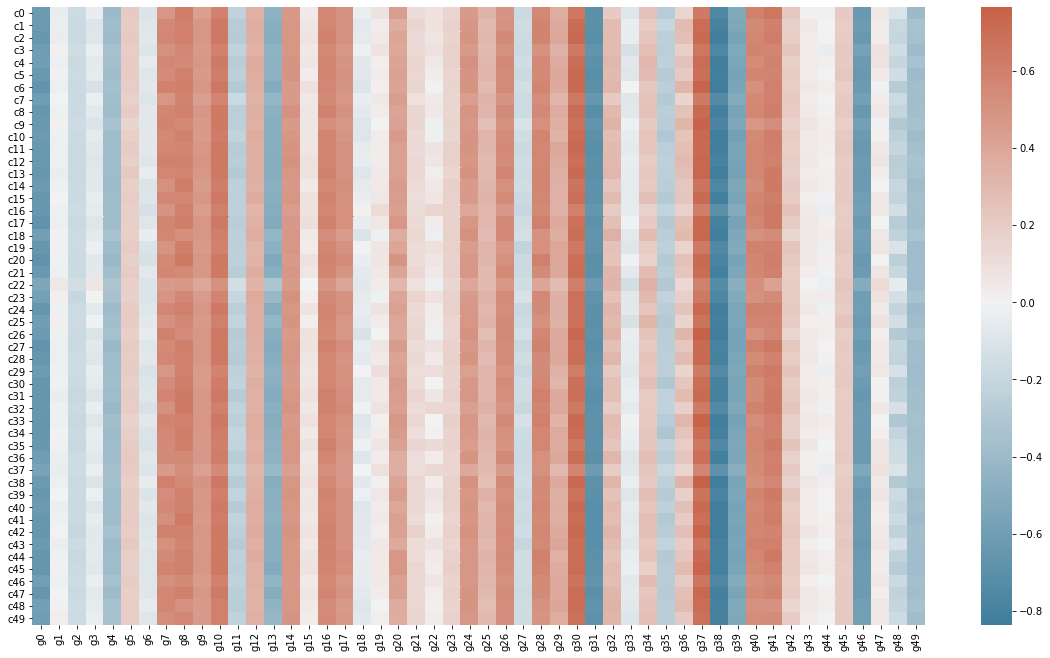

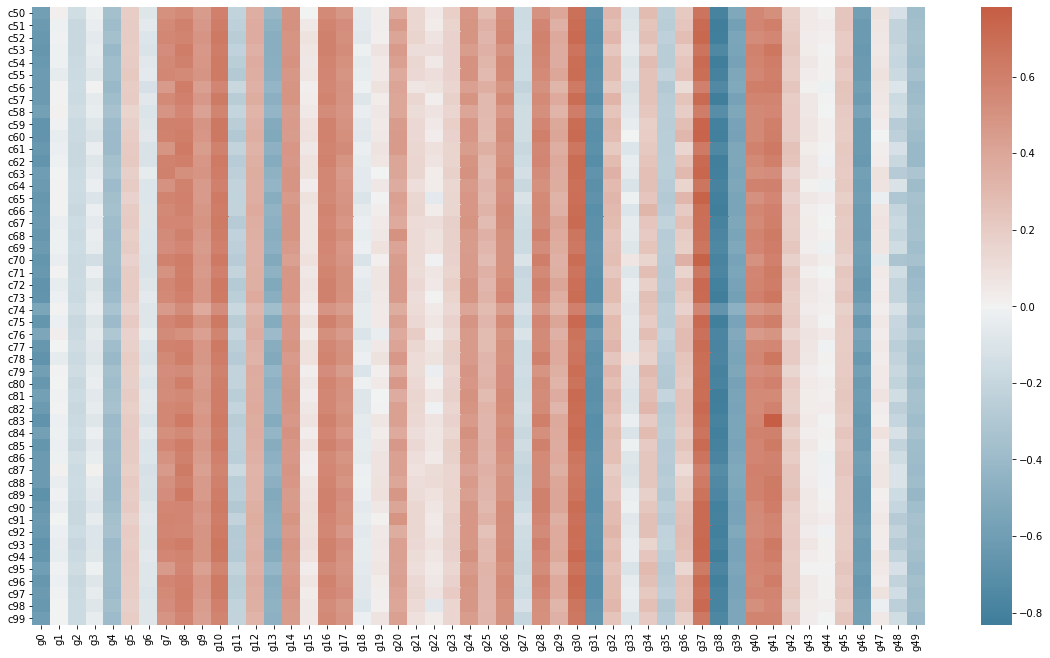

In [211]:
g0_50 = dados.loc[:,'g0':'g49']
c0_50 = dados.loc[:,'c0':'c49']
corrgc0_50 = pd.concat([g0_50,c0_50], axis=1).corr()
plt.figure(figsize=(20, 25))
plt.subplot(2,1,1)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corrgc050 = corrgc0_50.loc['c0':'c49','g0':'g49']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrgc050, cmap=cmap, center=0)

g0_50 = dados.loc[:,'g0':'g49']
c50_99 = dados.loc[:,'c50':'c99']
corrgc0_50 = pd.concat([g0_50,c50_99], axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 25))
plt.subplot(2,1,2)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corrgc0_50_99 = corrgc0_50.loc['c50':'c99','g0':'g49']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrgc0_50_99, cmap=cmap, center=0)

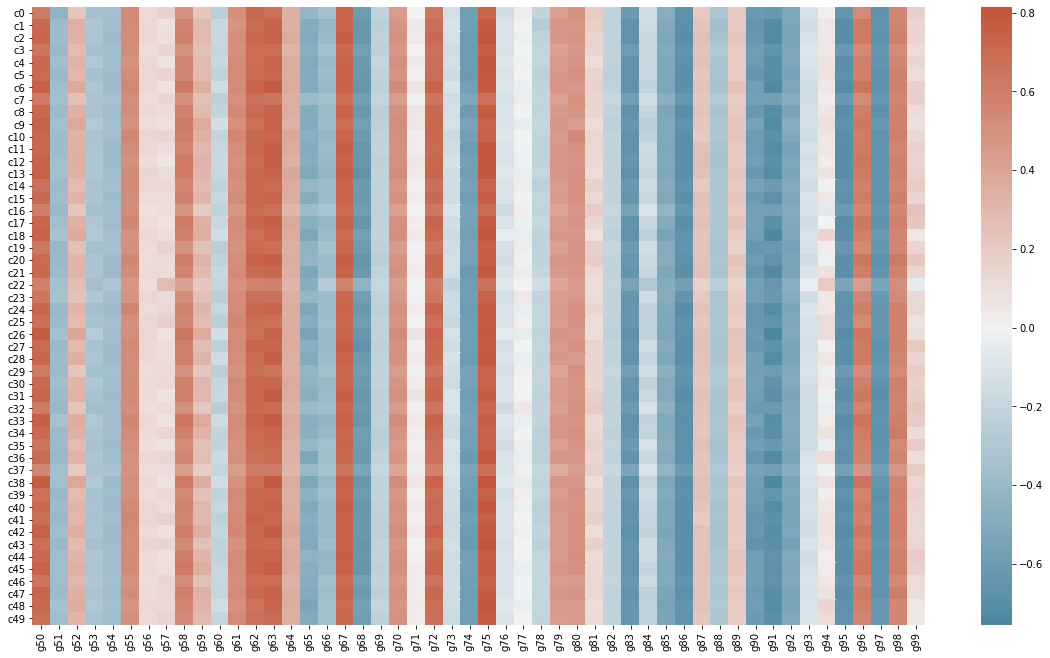

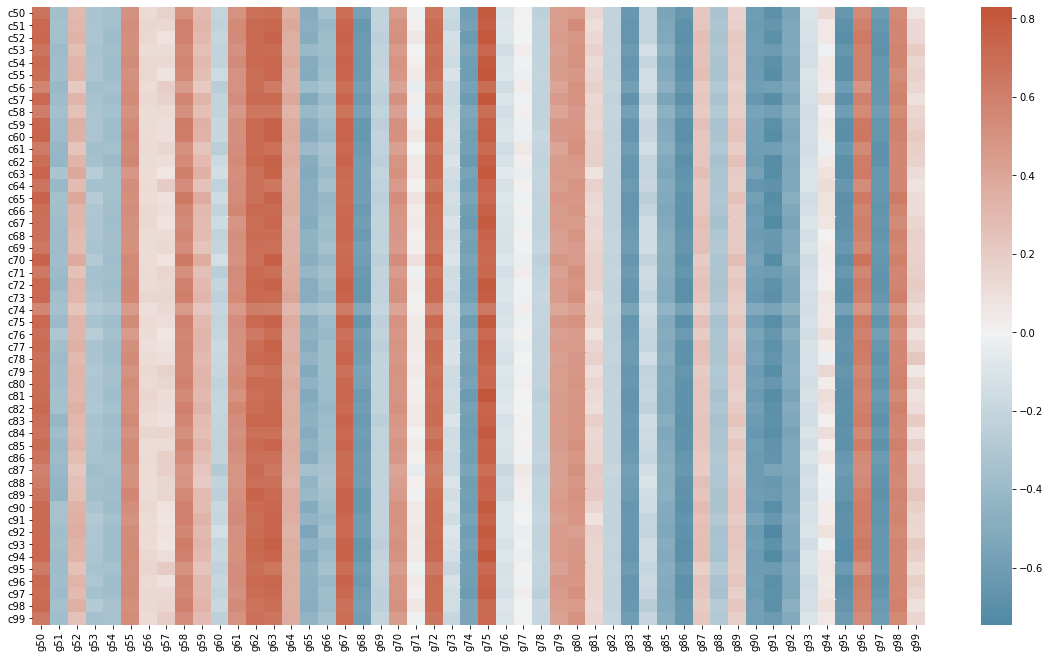

In [213]:
g50_99 = dados.loc[:,'g50':'g99']
c0_50 = dados.loc[:,'c0':'c49']
corrgc0_50 = pd.concat([g50_99,c0_50], axis=1).corr()
plt.figure(figsize=(20, 25))
plt.subplot(2,1,1)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corrgc050 = corrgc0_50.loc['c0':'c49','g50':'g99']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrgc050, cmap=cmap, center=0)

g50_99 = dados.loc[:,'g50':'g99']
c50_99 = dados.loc[:,'c50':'c99']
corrgc0_50 = pd.concat([g50_99,c50_99], axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 25))
plt.subplot(2,1,2)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corrgc0_50_99 = corrgc0_50.loc['c50':'c99','g50':'g99']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrgc0_50_99, cmap=cmap, center=0)

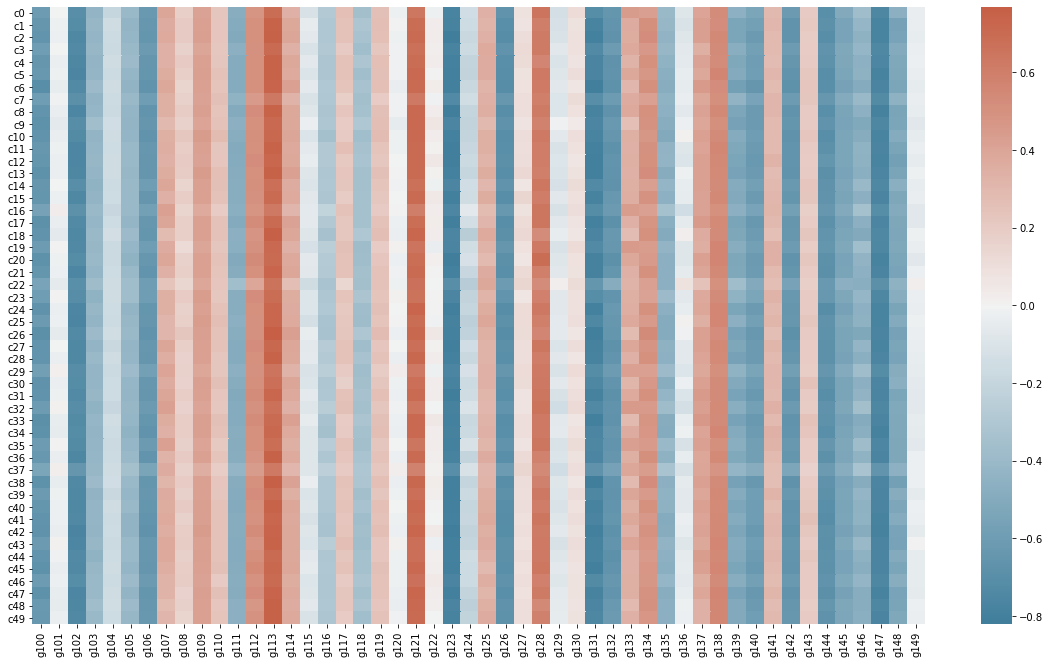

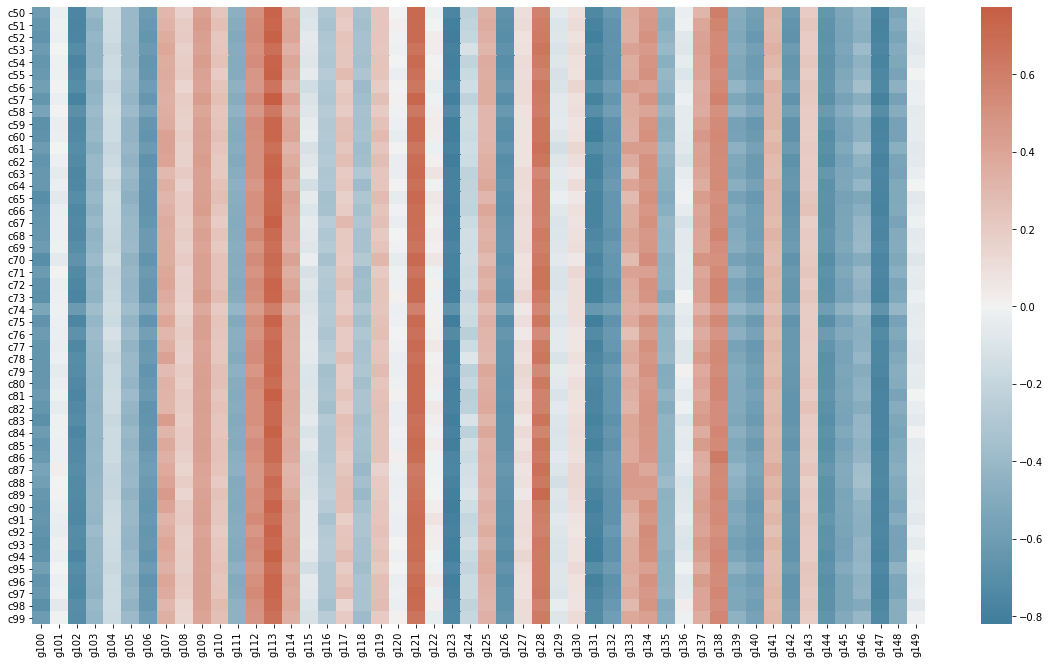

In [214]:
g100_149 = dados.loc[:,'g100':'g149']
c0_50 = dados.loc[:,'c0':'c49']
corrgc0_50 = pd.concat([g100_149,c0_50], axis=1).corr()
plt.figure(figsize=(20, 25))
plt.subplot(2,1,1)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corrgc050 = corrgc0_50.loc['c0':'c49','g100':'g149']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrgc050, cmap=cmap, center=0)

g100_149 = dados.loc[:,'g100':'g149']
c50_99 = dados.loc[:,'c50':'c99']
corrgc0_50 = pd.concat([g100_149,c50_99], axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 25))
plt.subplot(2,1,2)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corrgc0_50_99 = corrgc0_50.loc['c50':'c99','g100':'g149']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrgc0_50_99, cmap=cmap, center=0)

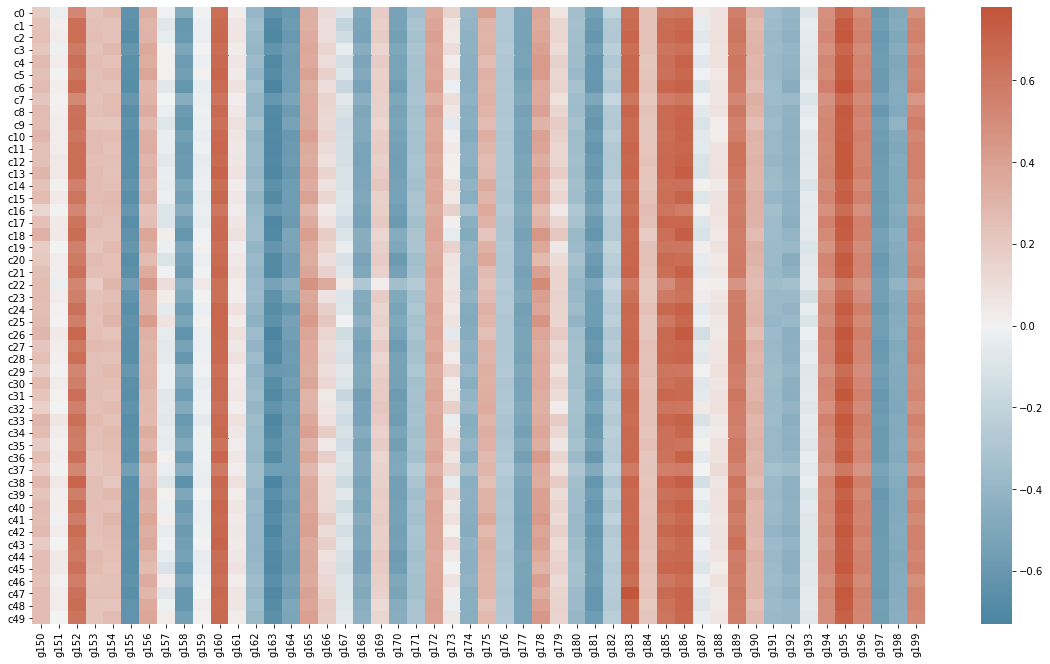

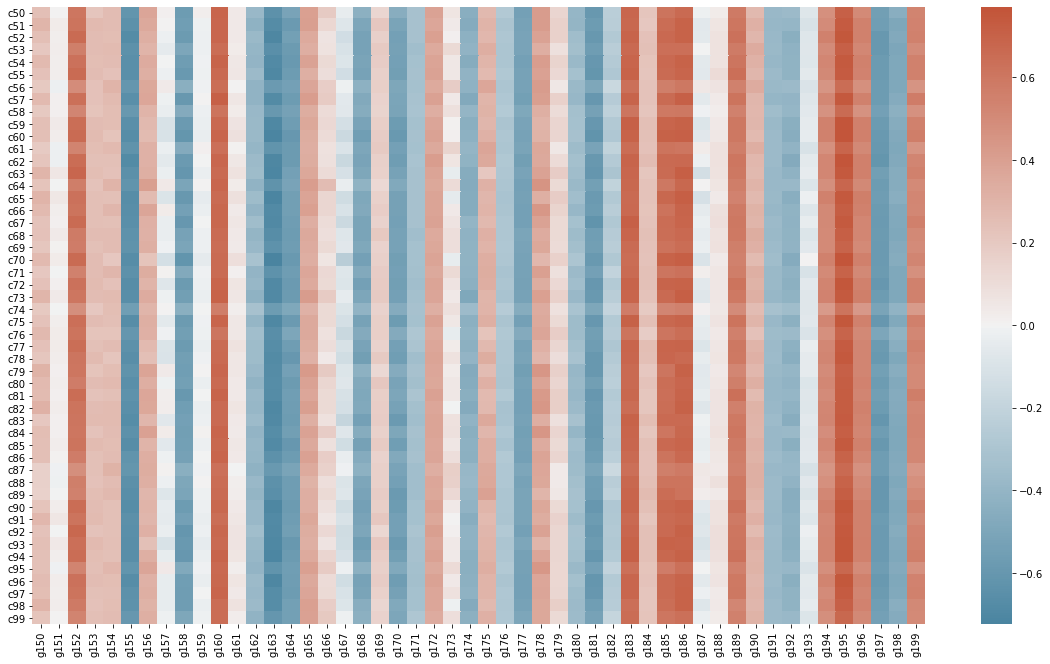

In [215]:
g150_199 = dados.loc[:,'g150':'g199']
c0_50 = dados.loc[:,'c0':'c49']
corrgc0_50 = pd.concat([g150_199,c0_50], axis=1).corr()
plt.figure(figsize=(20, 25))
plt.subplot(2,1,1)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corrgc050 = corrgc0_50.loc['c0':'c49','g150':'g199']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrgc050, cmap=cmap, center=0)

g150_199 = dados.loc[:,'g150':'g199']
c50_99 = dados.loc[:,'c50':'c99']
corrgc0_50 = pd.concat([g150_199,c50_99], axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 25))
plt.subplot(2,1,2)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corrgc0_50_99 = corrgc0_50.loc['c50':'c99','g150':'g199']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrgc0_50_99, cmap=cmap, center=0)

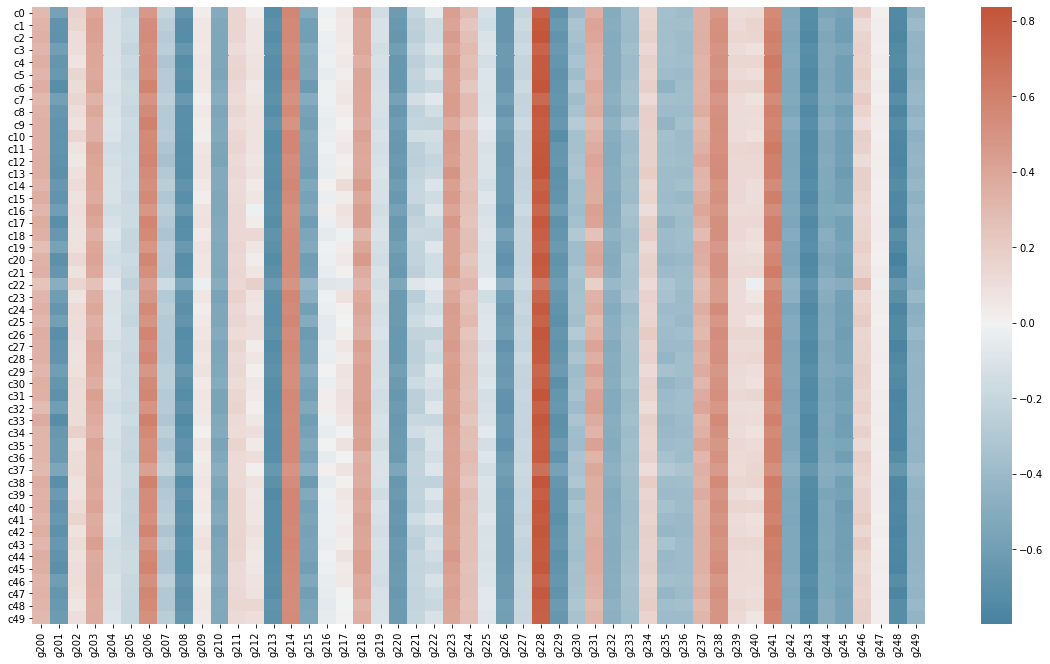

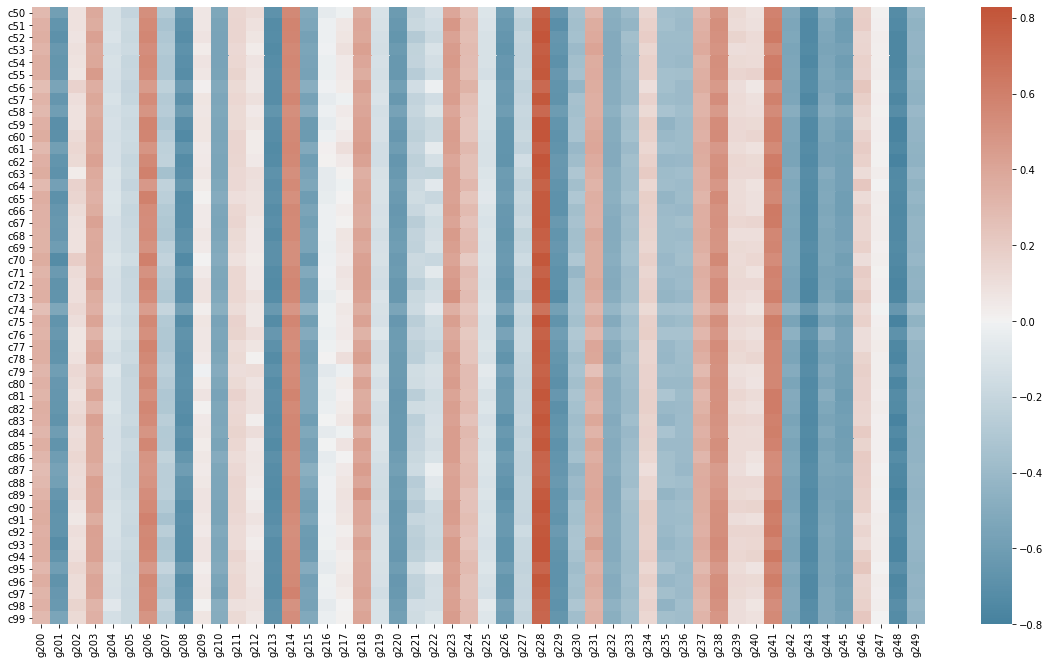

In [216]:
g200_249 = dados.loc[:,'g200':'g249']
c0_50 = dados.loc[:,'c0':'c49']
corrgc0_50 = pd.concat([g200_249,c0_50], axis=1).corr()
plt.figure(figsize=(20, 25))
plt.subplot(2,1,1)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corrgc050 = corrgc0_50.loc['c0':'c49','g200':'g249']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrgc050, cmap=cmap, center=0)

g200_249 = dados.loc[:,'g200':'g249']
c50_99 = dados.loc[:,'c50':'c99']
corrgc0_50 = pd.concat([g200_249,c50_99], axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 25))
plt.subplot(2,1,2)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corrgc0_50_99 = corrgc0_50.loc['c50':'c99','g200':'g249']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrgc0_50_99, cmap=cmap, center=0)

#Para não se tornar cansativo... Selecione A seção que deseja visualizar

Selelecione um intervalo de genes: 
(1)0-100 
 (2)100-200 
 (3)200-300 
 (4)300-400 
 (5)400-500 
 (6)500-600 
 (7)600-700 
 (8)700-771
5


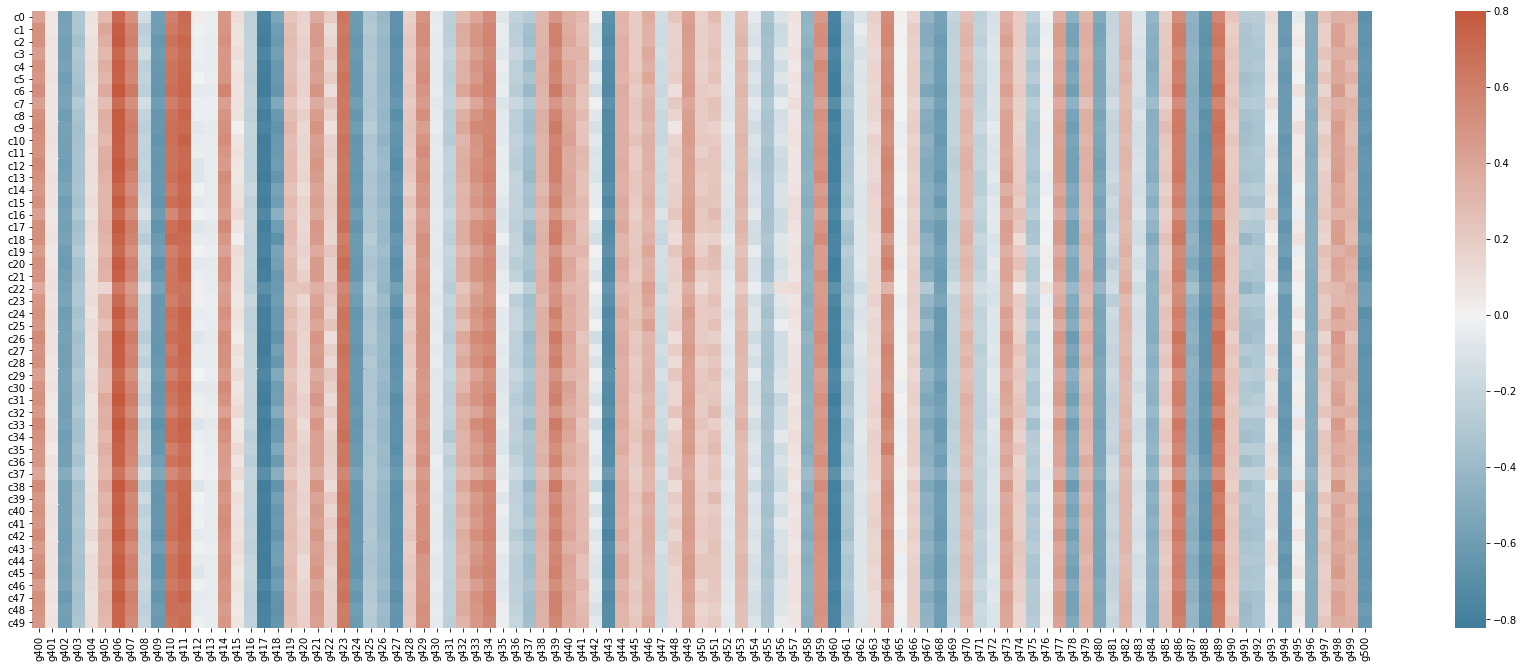

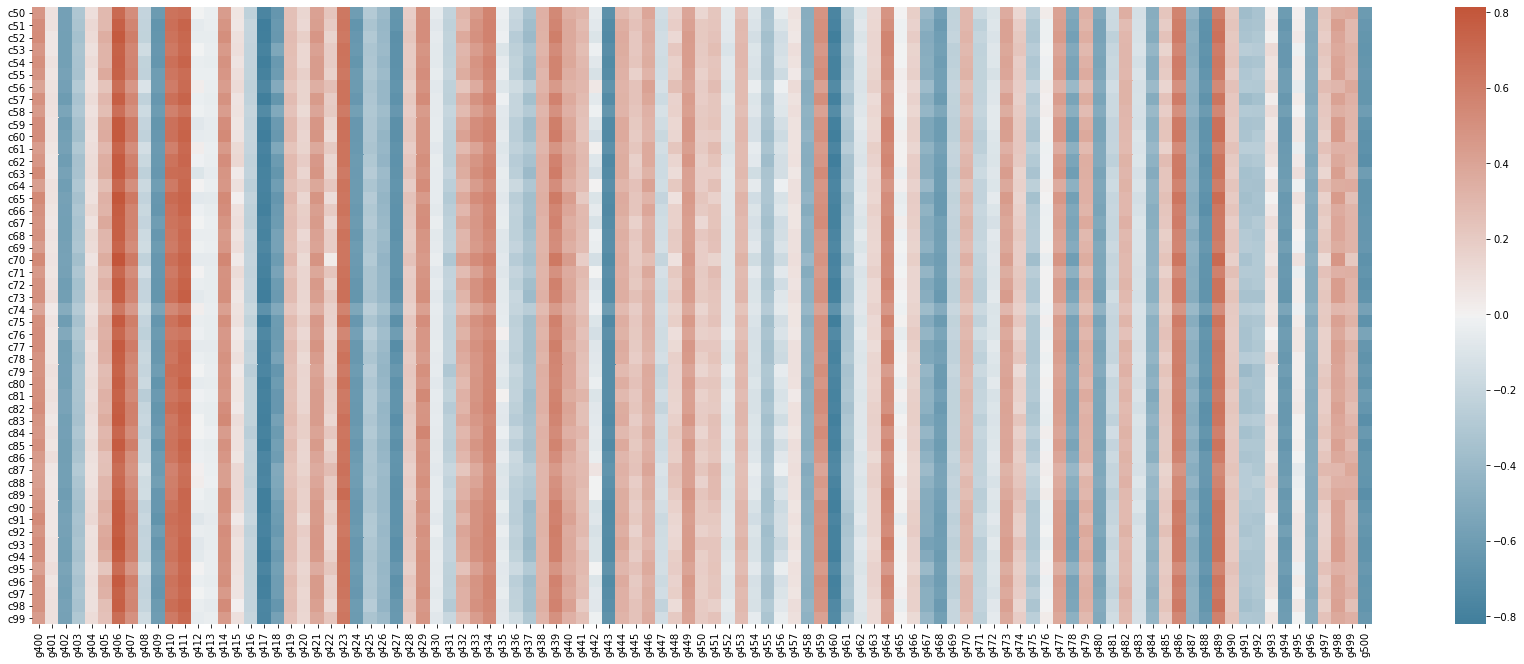

In [232]:
print("Selelecione um intervalo de genes: \n(1)0-100 \n (2)100-200 \n (3)200-300 \n (4)300-400 \n (5)400-500 \n (6)500-600 \n (7)600-700 \n (8)700-771")
intervalo = int(input())
while intervalo not in range(9):
  print("Selelecione um intervalo de genes: \n(1)0-100 \n (2)100-200 \n (3)200-300 \n (4)300-400 \n (5)400-500 \n (6)500-600 \n (7)600-771 \n (8)700-771")
  intervalo = int(input())
if intervalo in range(8):
  g1 = 'g'+(str)(intervalo*100 -100)
  g2 = 'g'+(str)(intervalo*100)
  g200_249 = dados.loc[:,g1:g2]
  c0_50 = dados.loc[:,'c0':'c49']
  corrgc0_50 = pd.concat([g200_249,c0_50], axis=1).corr()
  plt.figure(figsize=(30, 25))
  plt.subplot(2,1,1)

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  corrgc050 = corrgc0_50.loc['c0':'c49',g1:g2]
  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corrgc050, cmap=cmap, center=0)

  g200_249 = dados.loc[:,g1:g2]
  c50_99 = dados.loc[:,'c50':'c99']
  corrgc0_50 = pd.concat([g200_249,c50_99], axis=1).corr()

  # Set up the matplotlib figure
  plt.figure(figsize=(30, 25))
  plt.subplot(2,1,2)

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  corrgc0_50_99 = corrgc0_50.loc['c50':'c99',g1:g2]
  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corrgc0_50_99, cmap=cmap, center=0)
else:
  g1 = 'g'+(str)(intervalo*100 -100)
  g2 = 'g'+(str)(intervalo*100 - 29)
  g200_249 = dados.loc[:,g1:g2]
  c0_50 = dados.loc[:,'c0':'c49']
  corrgc0_50 = pd.concat([g200_249,c0_50], axis=1).corr()
  plt.figure(figsize=(30, 25))
  plt.subplot(2,1,1)

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  corrgc050 = corrgc0_50.loc['c0':'c49',g1:g2]
  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corrgc050, cmap=cmap, center=0)

  g200_249 = dados.loc[:,g1:g2]
  c50_99 = dados.loc[:,'c50':'c99']
  corrgc0_50 = pd.concat([g200_249,c50_99], axis=1).corr()

  # Set up the matplotlib figure
  plt.figure(figsize=(30, 25))
  plt.subplot(2,1,2)

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  corrgc0_50_99 = corrgc0_50.loc['c50':'c99',g1:g2]
  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corrgc0_50_99, cmap=cmap, center=0)

#Desafio 6
---
o HeatMap do seaborn plota um gráfico retangular de cores cuja entonação vária de acordo com o valor que está sendo mostrado no bloco específico. O que o código demonstrado em aula faz, é aplicar uma máscara sobre os dados para modificar o tipo de visualização para o triangular para evitar a redundância já que a matriz de correlação é simétrica. Entretanto, para o desafio 5 foi necessário uma outra abordagem já que o interesse era analisar a correlação cruzada dos genes com os tipos celulares. 

#Desafio 7
---
analisando inicialmente o agrupamento de dados com o crosstable, groupby e melt(+ pivot) é possível perceber um balanceamento ao relacionar os tipos de tratamento com o tempo e dosagem, Portanto é possível visualizar qualidade nos dados analisados, ou seja, aparentemente estão "sem vício" e não aparentam ser tendenciosos. A proporção nos tipos de tratamnto se manter no tempo e dosagem torna mais fácil a criação de um modelo posteriormente. Além disso, analisando os heatMaps no desafio 5, é observado que os genes em sua maioria mantém uma correlção aproximadamnte contante com todos os tipos celulares c do dataset, se um gene 'g0' possui um grau alto de correlação com um tipo celular 'c3' ele vai manter um grau alto de correlação com os demais c's, da mesma forma se 'g45' possuir um grau correlação baixo com o 'c1' é possível que o grau de correlação permaneça baixo para os demais c's, esse comportamento é notado ao visualizar a coloração de uma coluna do heatMap manter a coloração do início do gráfico até o final. Sendo assim, a relação entre c's e g's pode ser passível de generalização quando se for desejável a criação de uma inteligência artifícial para dados posteriores.       